In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

list_df = pd.read_csv('listings.csv.gz', compression='gzip')
review_df = pd.read_csv('reviews.csv.gz', compression='gzip')
cal_df = pd.read_csv('calendar.csv.gz', compression='gzip')

In [3]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,4.76,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.91
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,4.90,4.67,4.66,STR-OPLI-19-003039,f,9,0,9,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,4.95,4.98,4.91,STR-OPLI-19-002182,f,2,2,0,0,0.59
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,4.99,4.96,4.95,STR-OPLI-19-002182,f,2,2,0,0,0.52
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.66,4.91,4.56,STR -OPLI-19-002622,f,2,2,0,0,0.63


In [4]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f..."
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu..."
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...


In [5]:
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-12-21,f,$90.00,NaN,30.0,1125.0
1,6606,2023-12-22,f,$90.00,NaN,30.0,1125.0
2,6606,2023-12-23,t,$90.00,NaN,30.0,1125.0
3,6606,2023-12-24,t,$90.00,NaN,30.0,1125.0
4,6606,2023-12-25,t,$90.00,NaN,30.0,1125.0


In [6]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6882 non-null   int64  
 1   listing_url                                   6882 non-null   object 
 2   scrape_id                                     6882 non-null   int64  
 3   last_scraped                                  6882 non-null   object 
 4   source                                        6882 non-null   object 
 5   name                                          6882 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5013 non-null   object 
 8   picture_url                                   6882 non-null   object 
 9   host_id                                       6882 non-null   i

In [7]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468790 entries, 0 to 468789
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     468790 non-null  int64 
 1   id             468790 non-null  int64 
 2   date           468790 non-null  object
 3   reviewer_id    468790 non-null  int64 
 4   reviewer_name  468790 non-null  object
 5   comments       468730 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.5+ MB


In [9]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512306 entries, 0 to 2512305
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 134.2+ MB


In [46]:
list_df['price_float'] = list_df['price'].str.split("$").str[1]
list_df['price_float'] = list_df['price_float'].str.replace(",","")
list_df['price_float'] = list_df['price_float'].astype('float64')

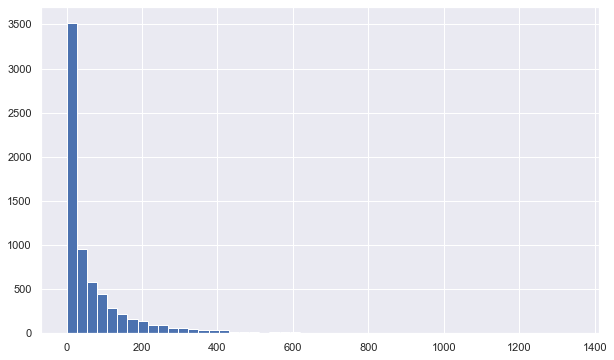

In [69]:
plt.hist(data=list_df, x = "number_of_reviews",bins = 50);

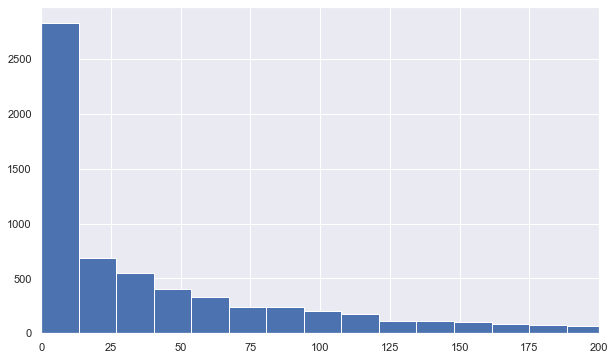

In [71]:
plt.hist(data=list_df, x = "number_of_reviews",bins = 100);
plt.xlim(0,200);

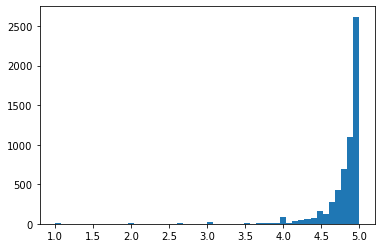

In [19]:
plt.hist(data=list_df, x = "review_scores_rating",bins = 50);


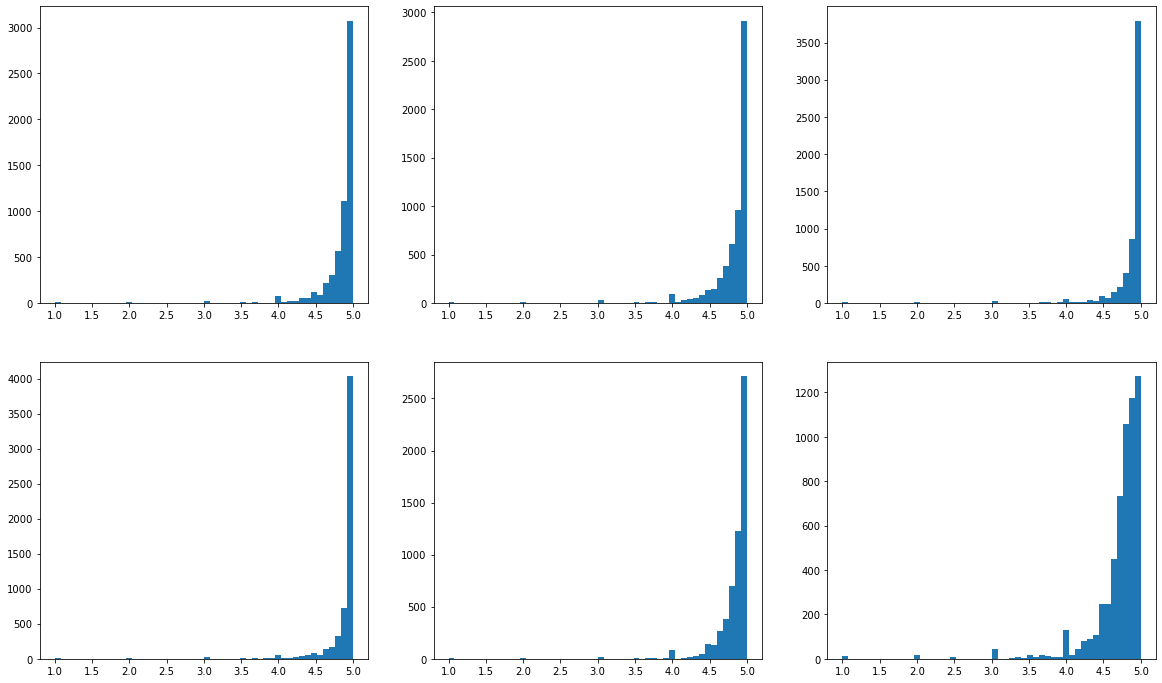

In [48]:
plt.figure(figsize = [20, 12]) 

plt.subplot(2, 3, 1) 
plt.hist(data=list_df, x='review_scores_accuracy', bins=50);


plt.subplot(2, 3, 2) 
plt.hist(data=df, x='review_scores_cleanliness', bins=50);


plt.subplot(2, 3, 3)  
plt.hist(data=df, x='review_scores_checkin', bins=50);


plt.subplot(2, 3, 4) 
plt.hist(data=df, x='review_scores_communication', bins=50);

plt.subplot(2, 3, 5)  
plt.hist(data=df, x='review_scores_location', bins=50);


plt.subplot(2, 3, 6) 
plt.hist(data=df, x='review_scores_value', bins=50);

In [50]:
list_df['neighbourhood_cleansed'].value_counts()

Broadway               388
Belltown               351
Wallingford            259
Fremont                254
University District    229
                      ... 
Meadowbrook             13
Rainier View            12
Industrial District      2
Harbor Island            1
Holly Park               1
Name: neighbourhood_cleansed, Length: 89, dtype: int64

In [55]:
neighborhood_counts = list_df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

Broadway               388
Belltown               351
Wallingford            259
Fremont                254
University District    229
                      ... 
Meadowbrook             13
Rainier View            12
Industrial District      2
Harbor Island            1
Holly Park               1
Name: neighbourhood_cleansed, Length: 89, dtype: int64


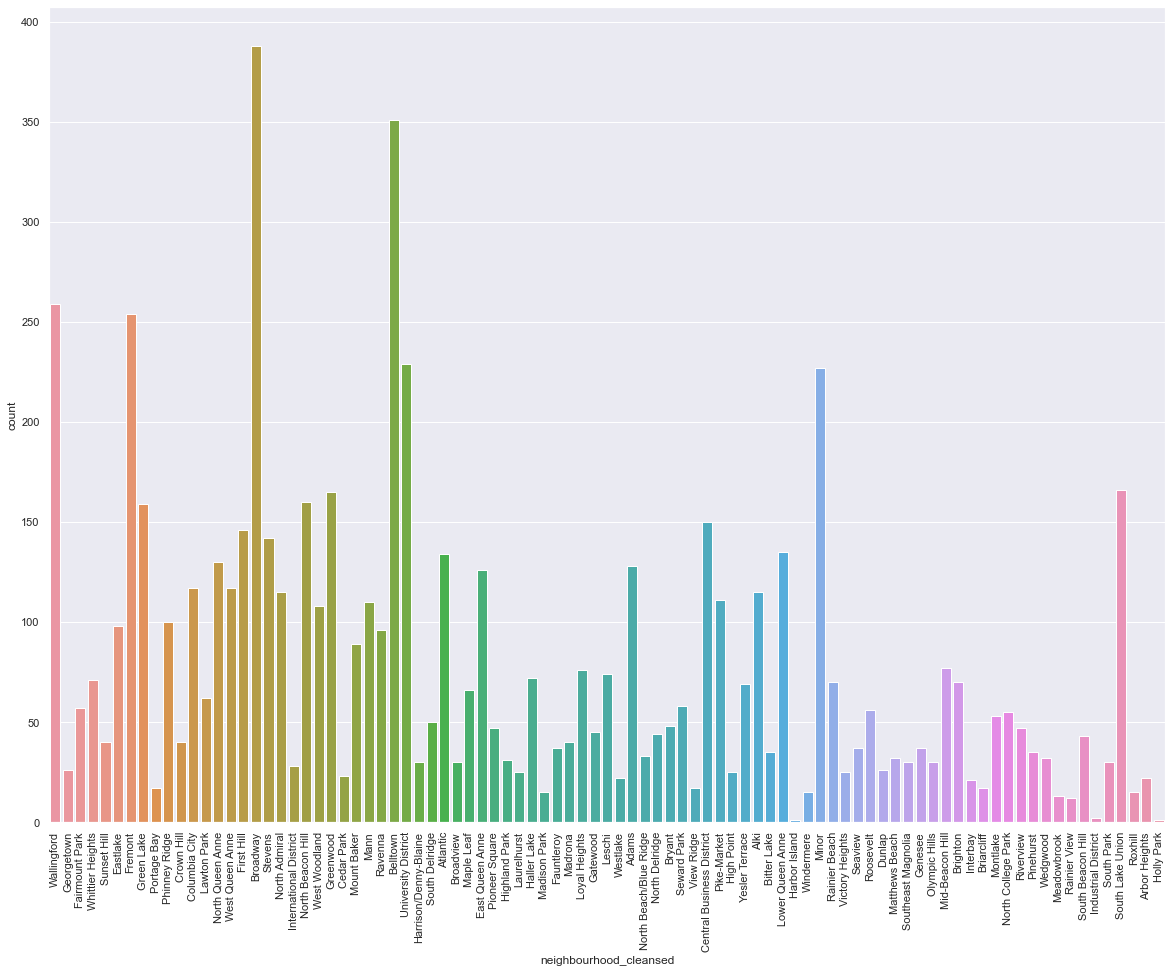

In [63]:
sns.countplot(data=list_df, x='neighbourhood_cleansed')
sns.set(rc={'figure.figsize':(25,20)})
plt.xticks(rotation = 90);

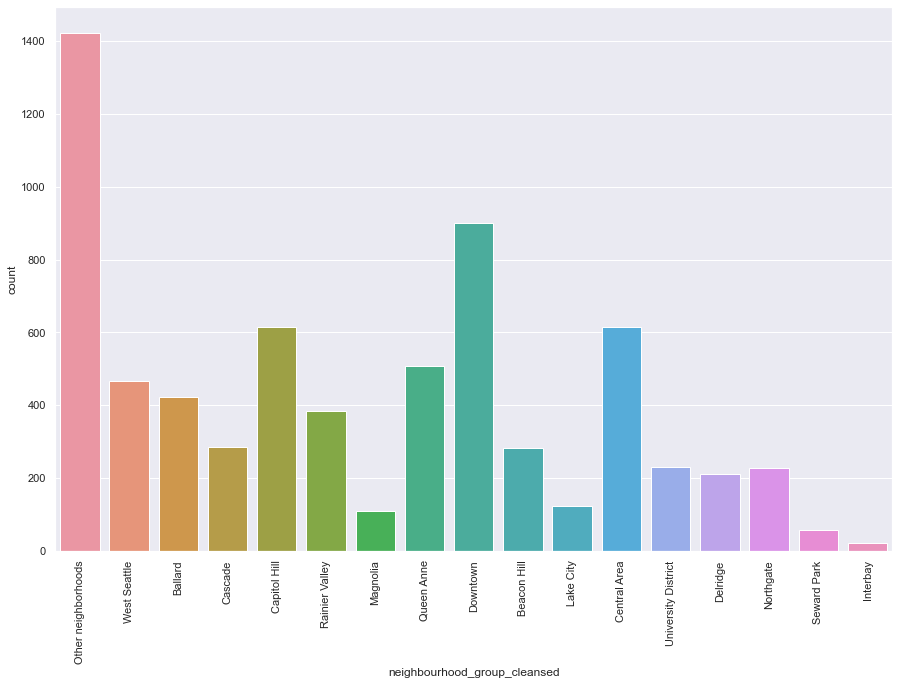

In [66]:
sns.countplot(data=list_df, x='neighbourhood_group_cleansed')
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation = 90);

In [74]:
list_df['accommodates'].value_counts()

2     2457
4     1607
6      818
3      531
5      358
8      325
1      269
7      141
10     132
12      74
16      60
9       46
11      28
14      23
15       7
13       6
Name: accommodates, dtype: int64

In [78]:
list_df['bathrooms_text'].value_counts()

1 bath               3940
2 baths              1029
2.5 baths             367
1 private bath        329
1.5 baths             313
1 shared bath         298
3 baths               229
3.5 baths             136
2 shared baths         68
1.5 shared baths       60
4 baths                34
3 shared baths         23
4.5 baths              10
Half-bath               9
0 baths                 8
0 shared baths          6
6 baths                 5
16 shared baths         4
4 shared baths          2
2.5 shared baths        2
6.5 baths               2
7 baths                 2
5 baths                 2
3.5 shared baths        1
Shared half-bath        1
Private half-bath       1
5.5 baths               1
Name: bathrooms_text, dtype: int64

In [79]:
list_df['beds'].value_counts()

1.0     2902
2.0     1874
3.0     1077
4.0      495
5.0      216
6.0      122
7.0       64
8.0       36
9.0       20
10.0      11
12.0       3
14.0       2
15.0       2
16.0       1
11.0       1
Name: beds, dtype: int64

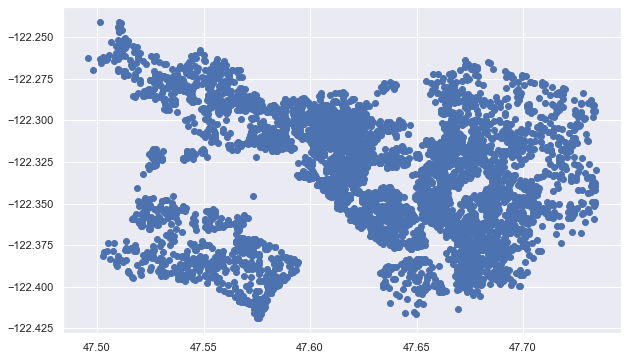